In [1]:
#web scrape
import requests
from bs4 import BeautifulSoup
archive_url = "https://clarksonmsda.org/ml/audio2/data/numbers/5/"

def get_video_links():

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_video_series(video_links):

	for link in video_links:
		file_name = link.split('/')[-1]

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All videos downloaded!")
	return


video_links = get_video_links()

download_video_series(video_links)
	

	

  

american_f_Alexa_20230406110150.wav downloaded!

american_m_Josh_20230405130012.wav downloaded!

american_m_Josh_20230405130013.wav downloaded!

american_m_Selorm_20230408180030.wav downloaded!

american_m_Shaun_20230406131836.wav downloaded!

american_m_Shaun_20230406131837.wav downloaded!

americans_m_MaximusPowers_20230404125947.wav downloaded!

brazilian_m_Maeva_20230406094754.wav downloaded!

indian_f_Bhavana_20230406090952.wav downloaded!

indian_f_Tejaswini_20230406085222.wav downloaded!

indian_m_AntarikshLodhi_20230410114208.wav downloaded!

indian_m_AntarikshLodhi_20230410114212.wav downloaded!

indian_m_AntarikshLodhi_20230410114219.wav downloaded!

sri-lankan_f_Chethani_20230410101807.wav downloaded!

sri-lankan_f_Dinushani_20230405112026.wav downloaded!

sri-lankan_f_Prathi_20230406133121.wav downloaded!

sri-lankan_f_Thevasha_20230405112448.wav downloaded!

sri-lankan_m_Roshan_20230406205732.wav downloaded!

sri-lankan_m_Roshan_20230406205733.wav downloaded!

sri-lankan_m

In [64]:
import IPython.display as ipd
ipd.Audio('audio/3/american_f_Maria_20230405140612.wav')

In [286]:
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/3"
dir_list = os.listdir(path)
for name in dir_list:
    print(name)

sri-lankan_f_Thevasha_20230405112448.wav
belizean_m_AaronUsher_20230406084838.wav
indian_f_Tejaswini_20230406085222.wav
american_m_Evan_20230406131112.wav
american_m_Josh_20230405130012.wav
american_m_Josh_20230405130013.wav
american_f_Alexa_20230406110150.wav
american_f_Dana_20230406131531.wav
americans_m_MaximusPowers_20230404125947.wav
indian_f_Bhavana_20230406090952.wav
american_f_Maria_20230405140612.wav
sri-lankan_f_Dinushani_20230405112026.wav
italian_m_Pablo_20230405121822.wav
.ipynb_checkpoints
venezuelan_f_Glories_20230406111759.wav
sri-lankan_m_Roshan_20230406205733.wav


32000

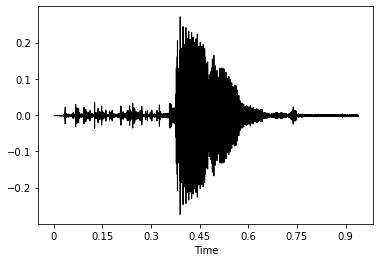

In [70]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/4"
y,sr=librosa.load('audio/3/american_f_Maria_20230405140612.wav',sr=32000)
librosa.display.waveshow(y,sr=sr,color='black')
sr


In [ ]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/5"
dir_list = os.listdir(path)
for name in range(0,len(dir_list)):
    actual='audio/5/'+dir_list[name]
    print(actual)
    y,sr=librosa.load(actual,sr=22050)
    librosa.display.waveshow(y,sr=sr,color='black')



In [71]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape


(1025, 59)

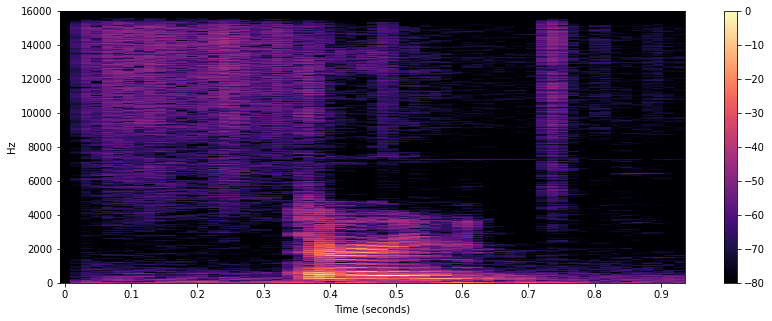

In [72]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(14,5))
img=librosa.display.specshow(s_db,sr=sr,x_axis='s',y_axis='linear')
plt.colorbar()

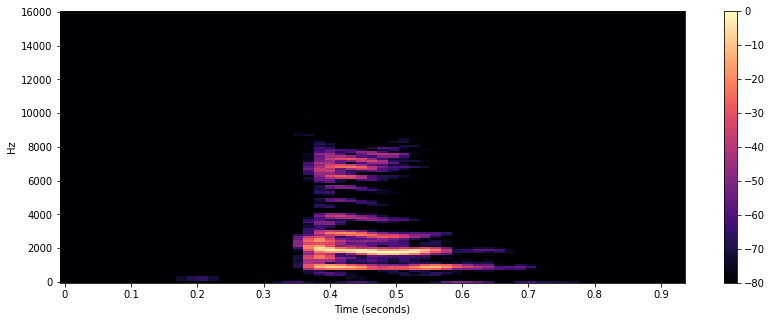

In [73]:
S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(14,5))
img=librosa.display.specshow(s_db_mel,sr=sr,x_axis='s',y_axis='linear')
plt.colorbar()

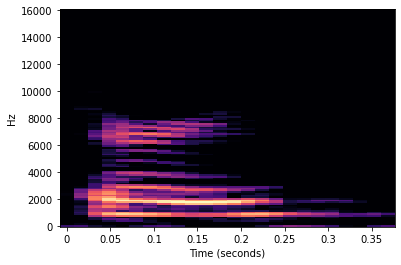

In [74]:
from scipy import stats 
mask = s_db_mel.max(axis=0) >-65  #np.min(stats.mode(s_db_mel))

filtered_arr = s_db_mel[:, mask]

img=librosa.display.specshow(filtered_arr,sr=sr,x_axis='s',y_axis='linear')


In [30]:
np.mean(s_db_mel,axis=1)

array([-79.81975 , -79.78537 , -78.293686, -75.44973 , -75.9359  ,
       -71.7332  , -70.82098 , -65.57386 , -67.94626 , -71.13692 ,
       -71.10727 , -68.68043 , -66.53445 , -67.954704, -71.60197 ,
       -74.83063 , -75.19073 , -75.44248 , -77.51014 , -78.41532 ,
       -79.22629 , -79.84055 , -79.90087 , -79.95406 , -80.      ,
       -79.98461 , -79.99012 , -80.      , -80.      , -80.      ,
       -79.98077 , -79.931305, -79.940926, -79.65911 , -78.12682 ,
       -78.391   , -78.70935 , -78.8587  , -77.31905 , -77.11622 ,
       -77.25447 , -76.95223 , -75.64787 , -75.3843  , -75.63359 ,
       -75.241905, -75.38822 , -77.08806 , -76.78158 , -77.04823 ,
       -77.053764, -76.912315, -77.792274, -78.72941 , -79.20035 ,
       -79.525894, -79.42418 , -78.98963 , -78.64916 , -78.4472  ,
       -78.75675 , -78.837585, -78.52352 , -78.99827 , -79.074814,
       -79.15821 , -78.628456, -78.263016, -77.2902  , -76.849625,
       -78.66842 , -78.955475, -79.399025, -79.413795, -79.562

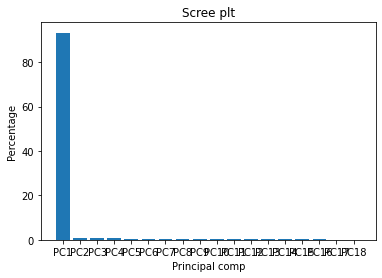

In [10]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(s_db_mel)
pca_data = pca.transform(s_db_mel)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()